In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv
cars = pd.read_csv("MY2023_Fuel_Consumption_Ratings.csv")
cars.head()

,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [3]:
# List columns
cars.columns.to_list()

['Model Year',
 'Make',
 'Model',
 'Vehicle Class',
 'Engine Size (L)',
 'Cylinders',
 'Transmission',
 'Fuel Type',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions (g/km)',
 'CO2 Rating',
 'Smog Rating']

In [4]:
# Drop unwanted
cars = cars.drop(columns=[
    'Model Year',
    'Transmission',
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)'
])

In [5]:
# Print unique classes
print(cars["Vehicle Class"].unique())

['Full-size' 'SUV: Small' 'SUV: Standard' 'Compact' 'Mid-size'
 'Minicompact' 'Two-seater' 'Subcompact' 'Station wagon: Small'
 'Station wagon: Mid-size' 'Pickup truck: Small' 'Pickup truck: Standard'
 'Minivan' 'Special purpose vehicle']


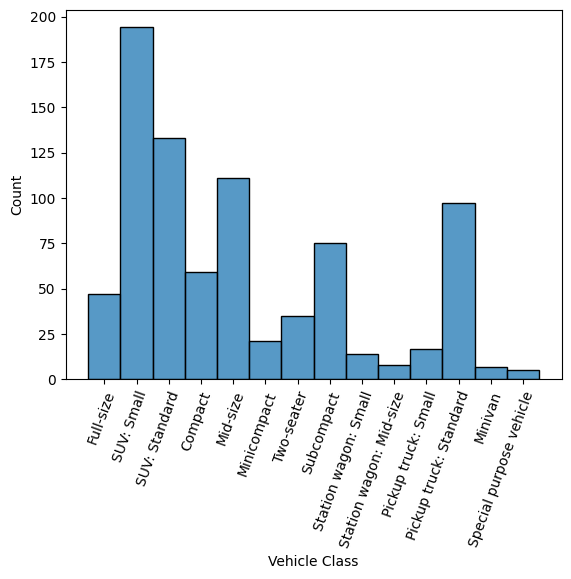

In [6]:
# Histogram
fig, ax = plt.subplots()
sns.histplot(data=cars, x="Vehicle Class")
# Rotate ticks
plt.xticks(rotation=70, ha="right", rotation_mode="anchor")
plt.show()

## Play with `binwidth` here to show how it can affect it

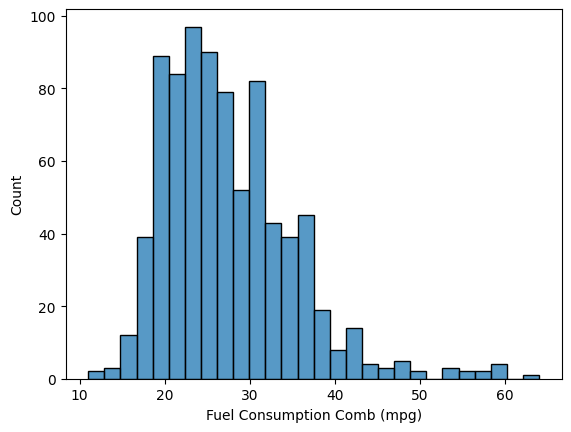

In [7]:
# Default histogram
sns.histplot(data=cars, x="Fuel Consumption Comb (mpg)")
plt.show()

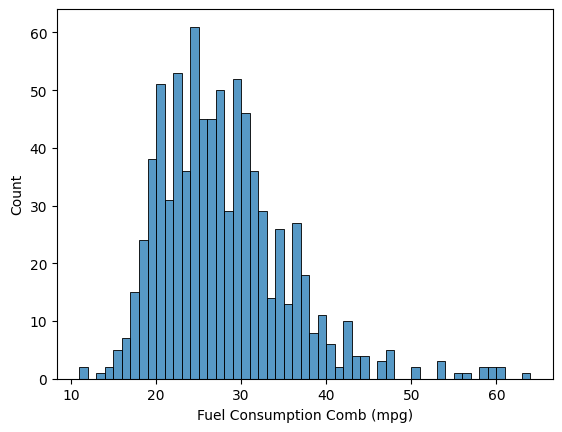

In [8]:
# Changing bin sizes can change how the data look
sns.histplot(data=cars, x="Fuel Consumption Comb (mpg)", binwidth=1)
plt.show()

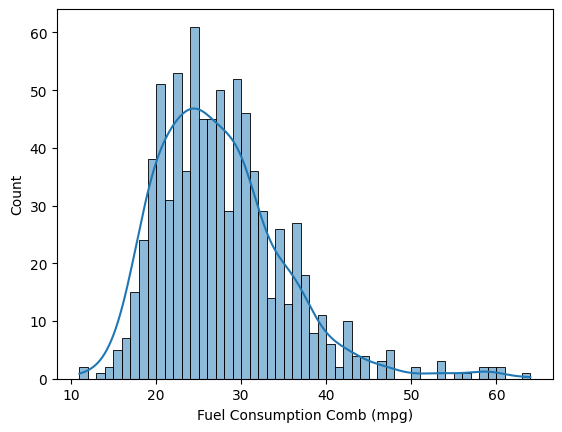

In [9]:
# Can use kernel density estimate, which treats each point as tiny Gaussian
sns.histplot(data=cars, x="Fuel Consumption Comb (mpg)", binwidth=1, kde=True)
plt.show()

## More histograms is hard to see, so maybe use KDE

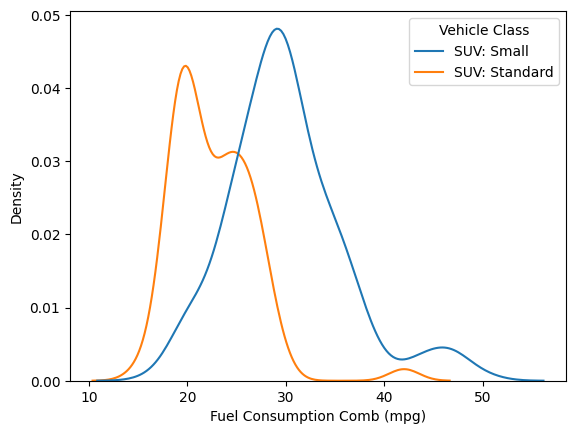

In [10]:
# Get SUVs
subset = cars[cars["Vehicle Class"].str.contains("SUV")]

# Plot KDE without histogram. Hue argument displays each unique in that column separately
sns.kdeplot(data=subset, x="Fuel Consumption Comb (mpg)", hue="Vehicle Class")
plt.show()

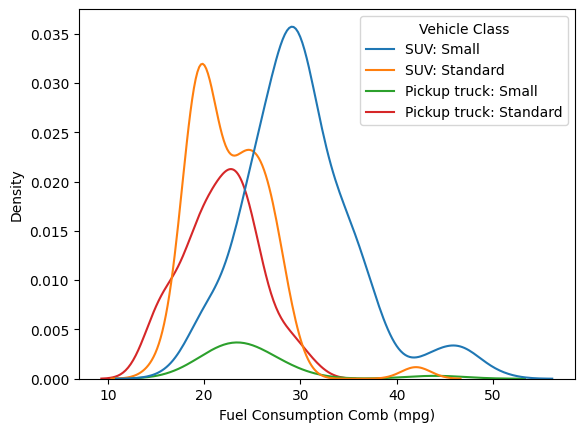

In [11]:
# Add trucks
subset = cars[(cars["Vehicle Class"].str.contains("SUV")) | (cars["Vehicle Class"].str.contains("Pickup"))]

# Now it shows 4 instead of 2
sns.kdeplot(data=subset, x="Fuel Consumption Comb (mpg)", hue="Vehicle Class")
plt.show()

<AxesSubplot:xlabel='Cylinders', ylabel='Fuel Consumption Comb (mpg)'>

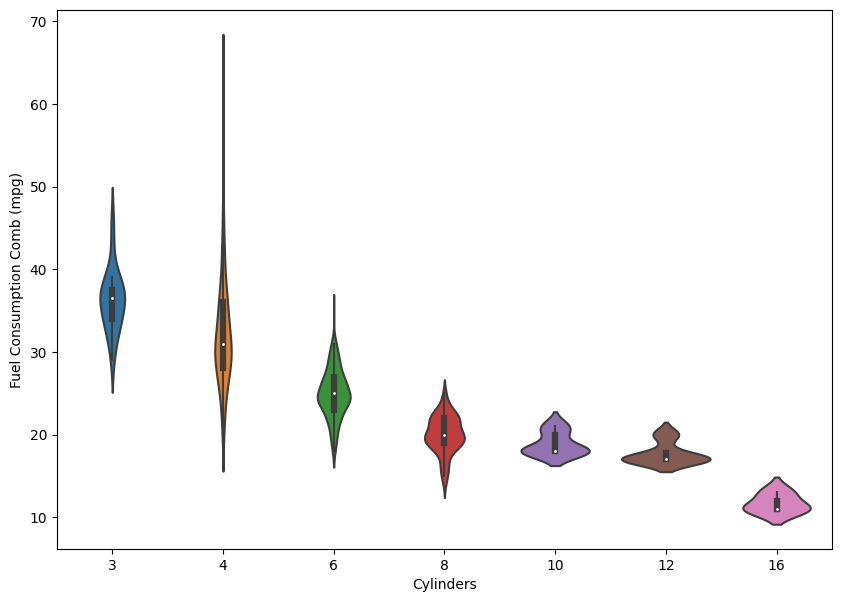

In [12]:
# Violin plot shows distributions across categorical variable
plt.figure(figsize=(10,7))
sns.violinplot(data=cars, x="Cylinders", y="Fuel Consumption Comb (mpg)")

## Scatters

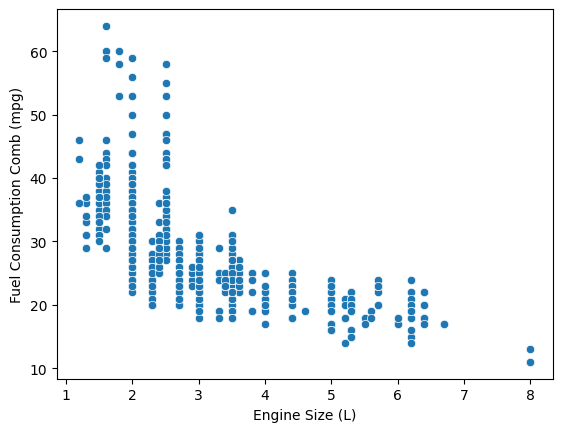

In [13]:
# Scatter
sns.scatterplot(data=cars, x="Engine Size (L)", y="Fuel Consumption Comb (mpg)")
plt.show()

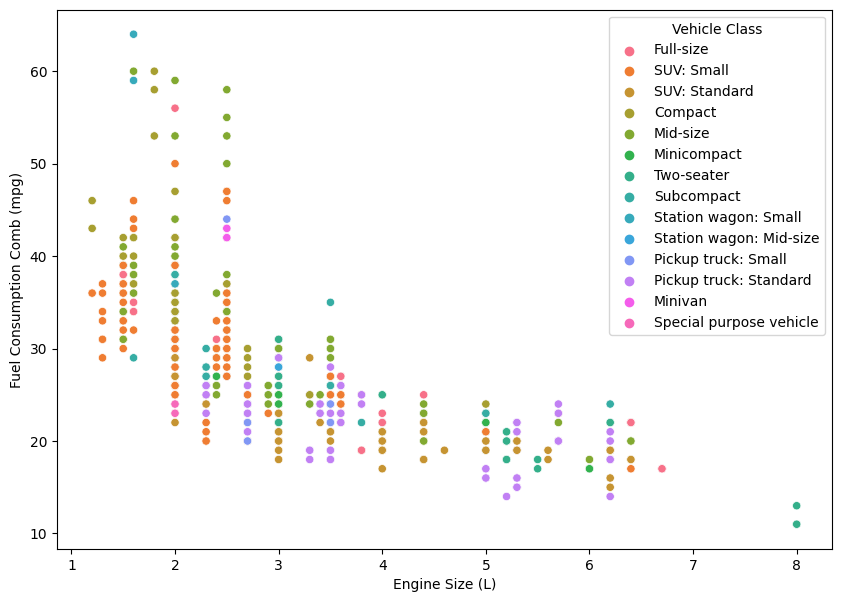

In [14]:
# Scatter with hue
plt.figure(figsize=(10,7))
sns.scatterplot(data=cars, x="Engine Size (L)", y="Fuel Consumption Comb (mpg)", hue="Vehicle Class")
plt.show()

# STOPPED HERE

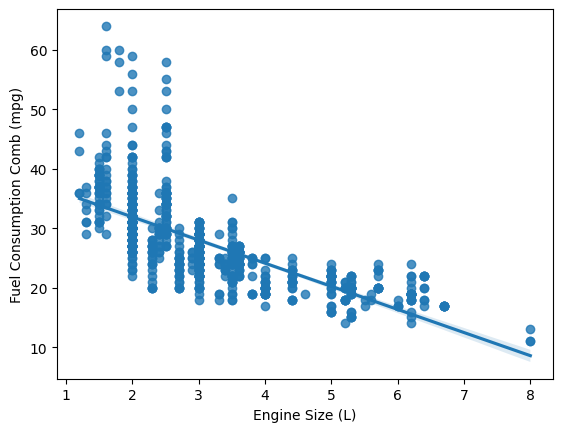

In [15]:
# Add trendline
sns.regplot(data=cars, x="Engine Size (L)", y="Fuel Consumption Comb (mpg)")
plt.show()

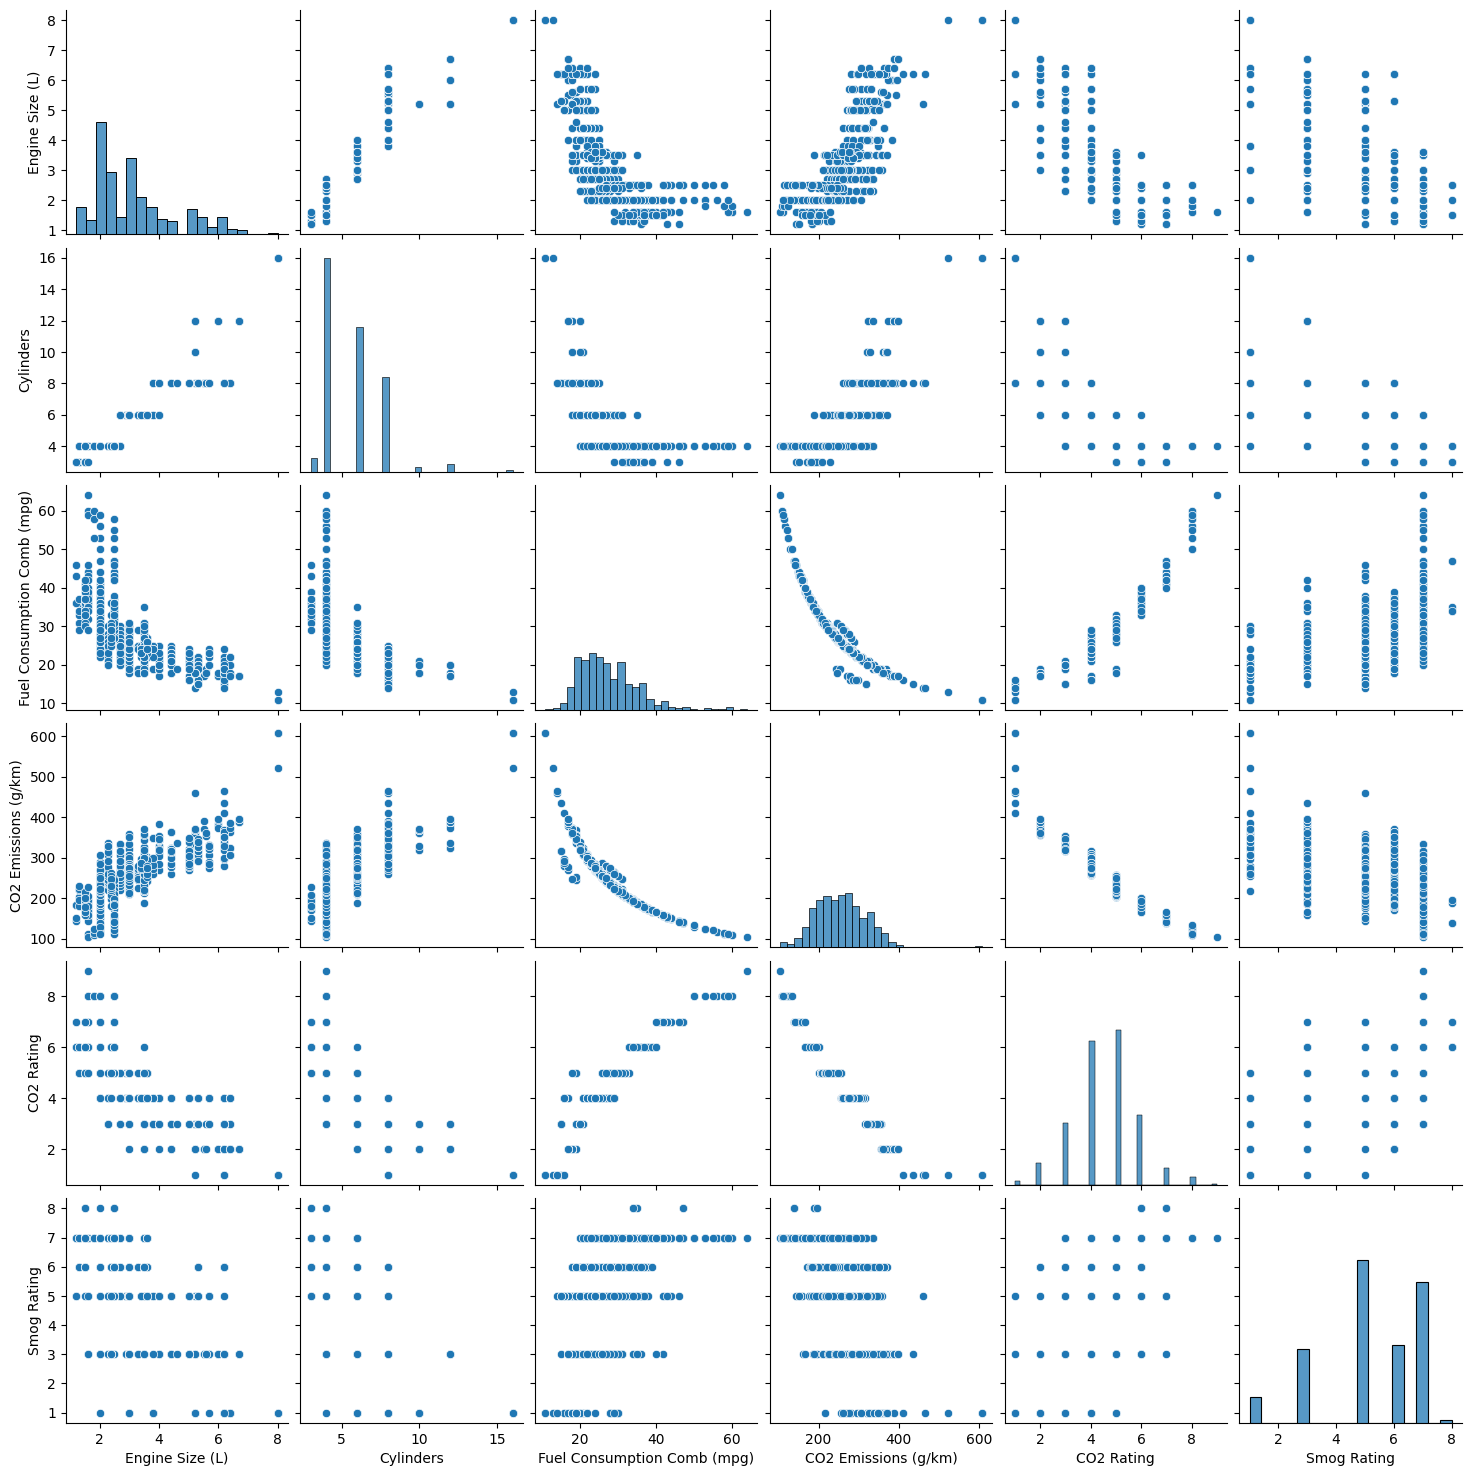

In [16]:
# Compare all the columns against each other for trends at a glance
sns.pairplot(data=cars)
plt.show()

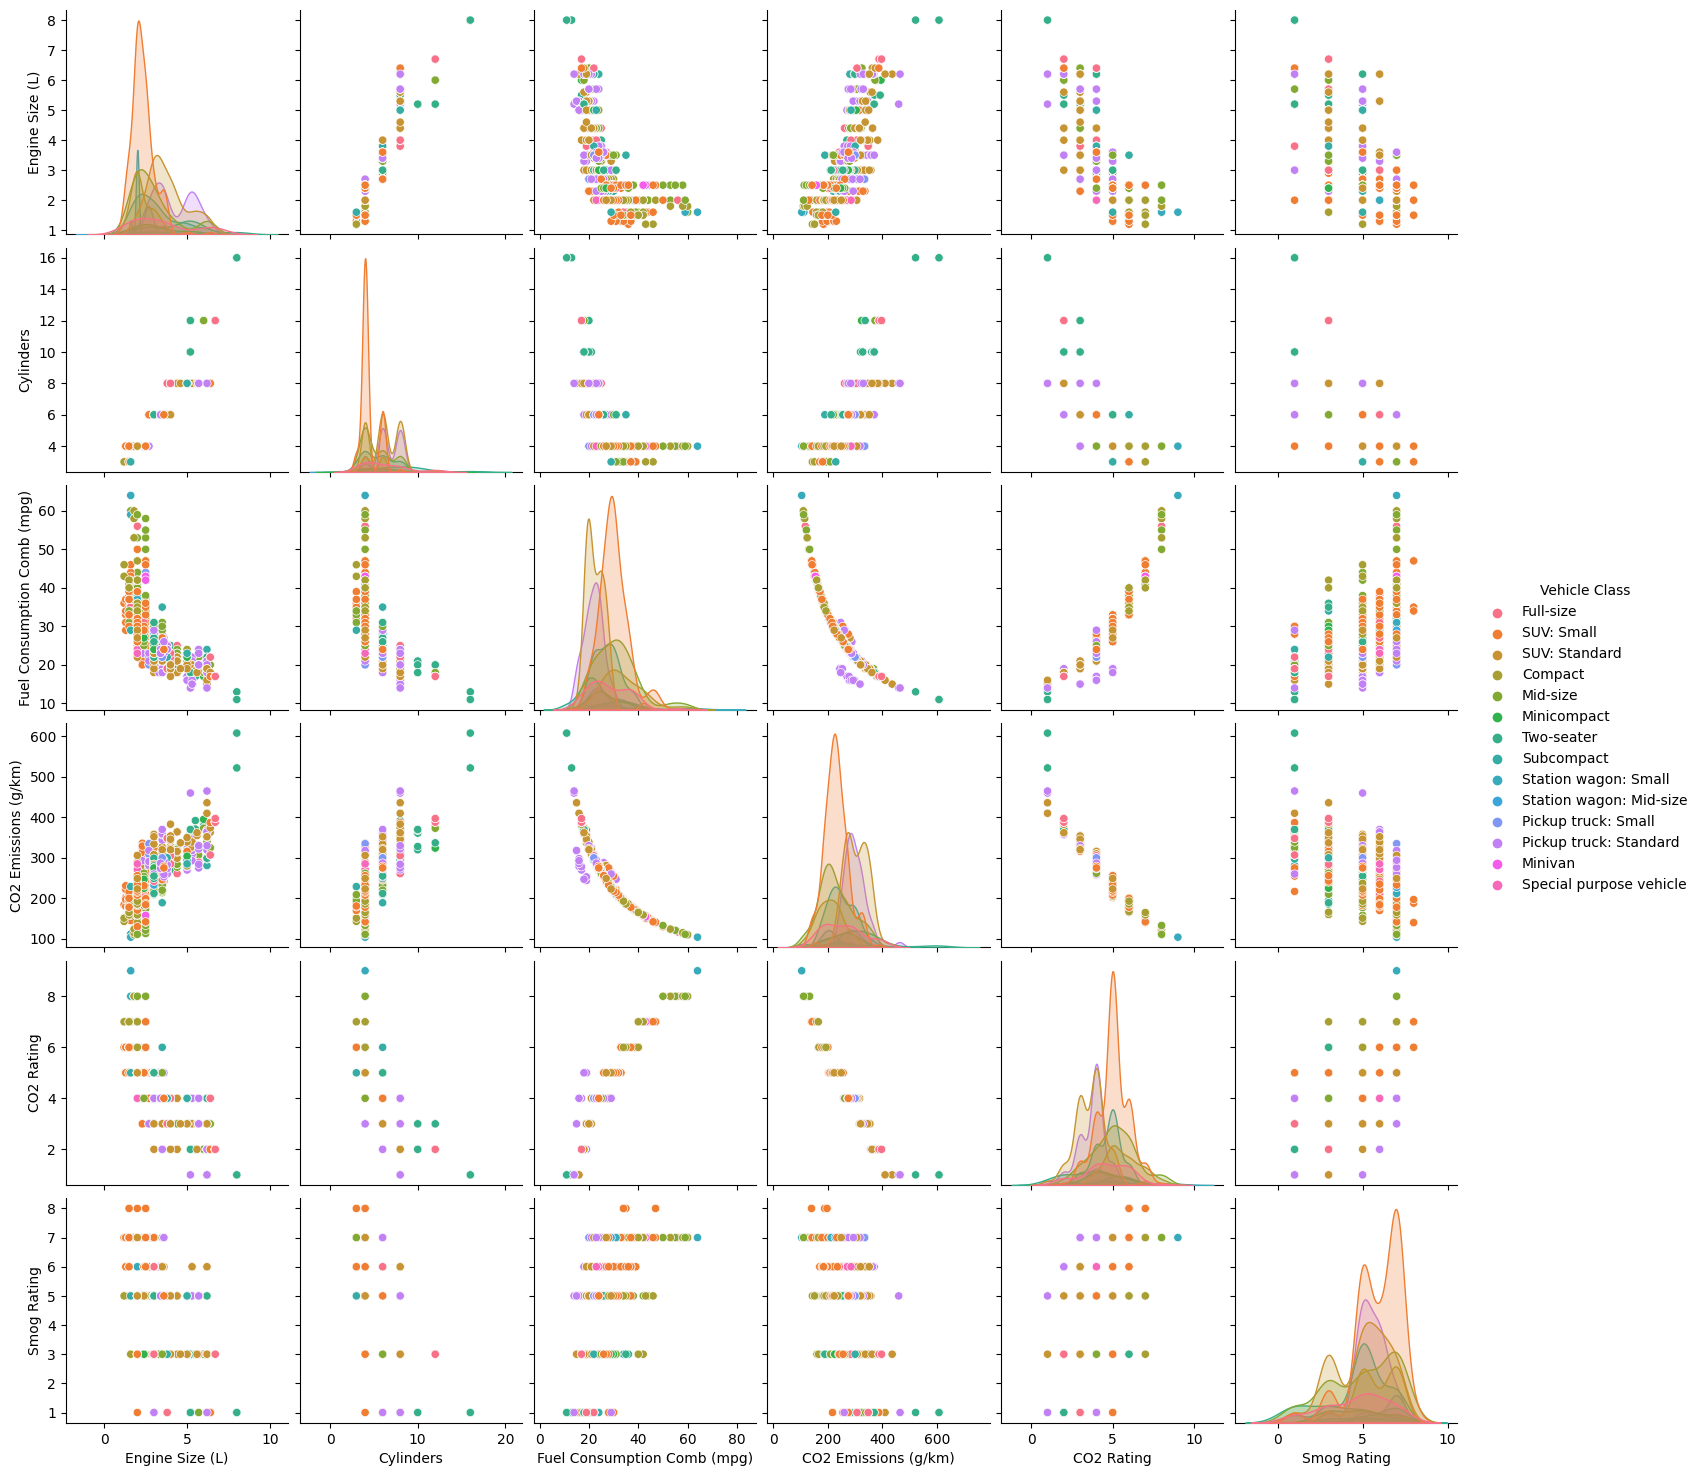

In [17]:
# Add hue separation
sns.pairplot(data=cars, hue="Vehicle Class")
plt.show()

In [18]:
# Aggregate means using groupby
v_classes = cars.groupby(by="Vehicle Class").mean()
v_classes = v_classes.sort_values(by="Fuel Consumption Comb (mpg)")
v_classes

,Engine Size (L),Cylinders,Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
Vehicle Class,,,,,,
Pickup truck: Standard,4.177320,6.701031,21.793814,298.804124,3.680412,5.319588
Two-seater,4.520000,8.342857,22.628571,318.028571,3.542857,3.171429
SUV: Standard,3.778195,6.616541,22.631579,302.413534,3.646617,4.939850
Station wagon: Mid-size,3.862500,7.250000,24.375000,284.125000,4.000000,4.625000
Pickup truck: Small,2.735294,4.352941,24.882353,276.411765,4.235294,6.411765
Special purpose vehicle,2.000000,4.000000,26.400000,252.800000,4.400000,6.000000
Minicompact,3.142857,6.190476,26.666667,259.333333,4.428571,4.714286
Subcompact,3.085333,5.533333,27.413333,249.493333,4.666667,5.053333
Full-size,3.523404,6.255319,28.297872,254.000000,4.595745,4.617021


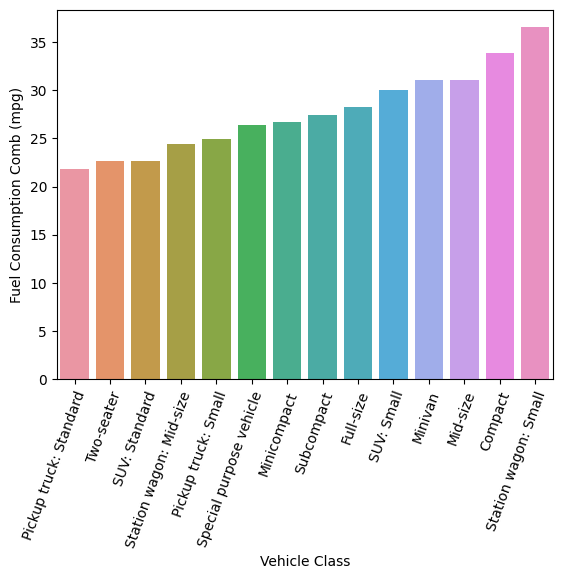

In [19]:
# Bar chart
sns.barplot(data=v_classes, x=v_classes.index, y="Fuel Consumption Comb (mpg)")
plt.xticks(rotation=70, ha="right", rotation_mode="anchor")
plt.show()

In [20]:
# Load usda
usda = pd.read_csv("usda_farm_indices.csv")
usda.head(10)

,Year,Attribute,Value
0,1948,Total agricultural output,0.362833
1,1948,Livestock and products output: Total 1/,0.437903
2,1948,Livestock and products output: Meat animals,0.562957
3,1948,Livestock and products output: Dairy,0.448529
4,1948,Livestock and products output: Poultry and eggs,0.129304
5,1948,Crops output: Total,0.338529
6,1948,Crops output: Food grains,0.524309
7,1948,Crops output: Feed crops,0.392067
8,1948,Crops output: Oil crops,0.110668
9,1948,Crops output: Vegetables and melons,0.397223


<AxesSubplot:xlabel='Year', ylabel='Value'>

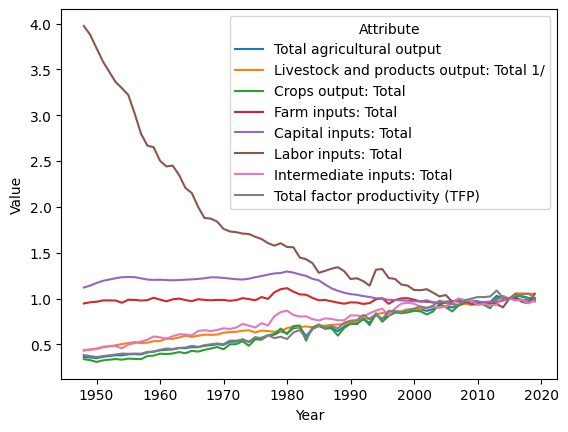

In [21]:
# Line plots
sns.lineplot(data=usda[usda["Attribute"].str.contains("Total")], x="Year", y="Value", hue="Attribute")

In [22]:
# One liner to make pivot table from other lesson
usda_pivot = usda[usda["Attribute"].str.contains("Total")].pivot(index="Year", columns="Attribute", values="Value")
usda_pivot.head()

Attribute,Capital inputs: Total,Crops output: Total,Farm inputs: Total,Intermediate inputs: Total,Labor inputs: Total,Livestock and products output: Total 1/,Total agricultural output,Total factor productivity (TFP)
Year,,,,,,,,
1948,1.120363,0.338529,0.946524,0.431257,3.974612,0.437903,0.362833,0.383332
1949,1.140866,0.327655,0.959364,0.445904,3.878824,0.440938,0.357259,0.372391
1950,1.169548,0.308353,0.964567,0.454706,3.731842,0.448577,0.348639,0.361446
1951,1.192800,0.325324,0.979596,0.475389,3.588449,0.466605,0.364145,0.371730
1953,1.221481,0.339858,0.978607,0.481813,3.362526,0.489349,0.380998,0.389327


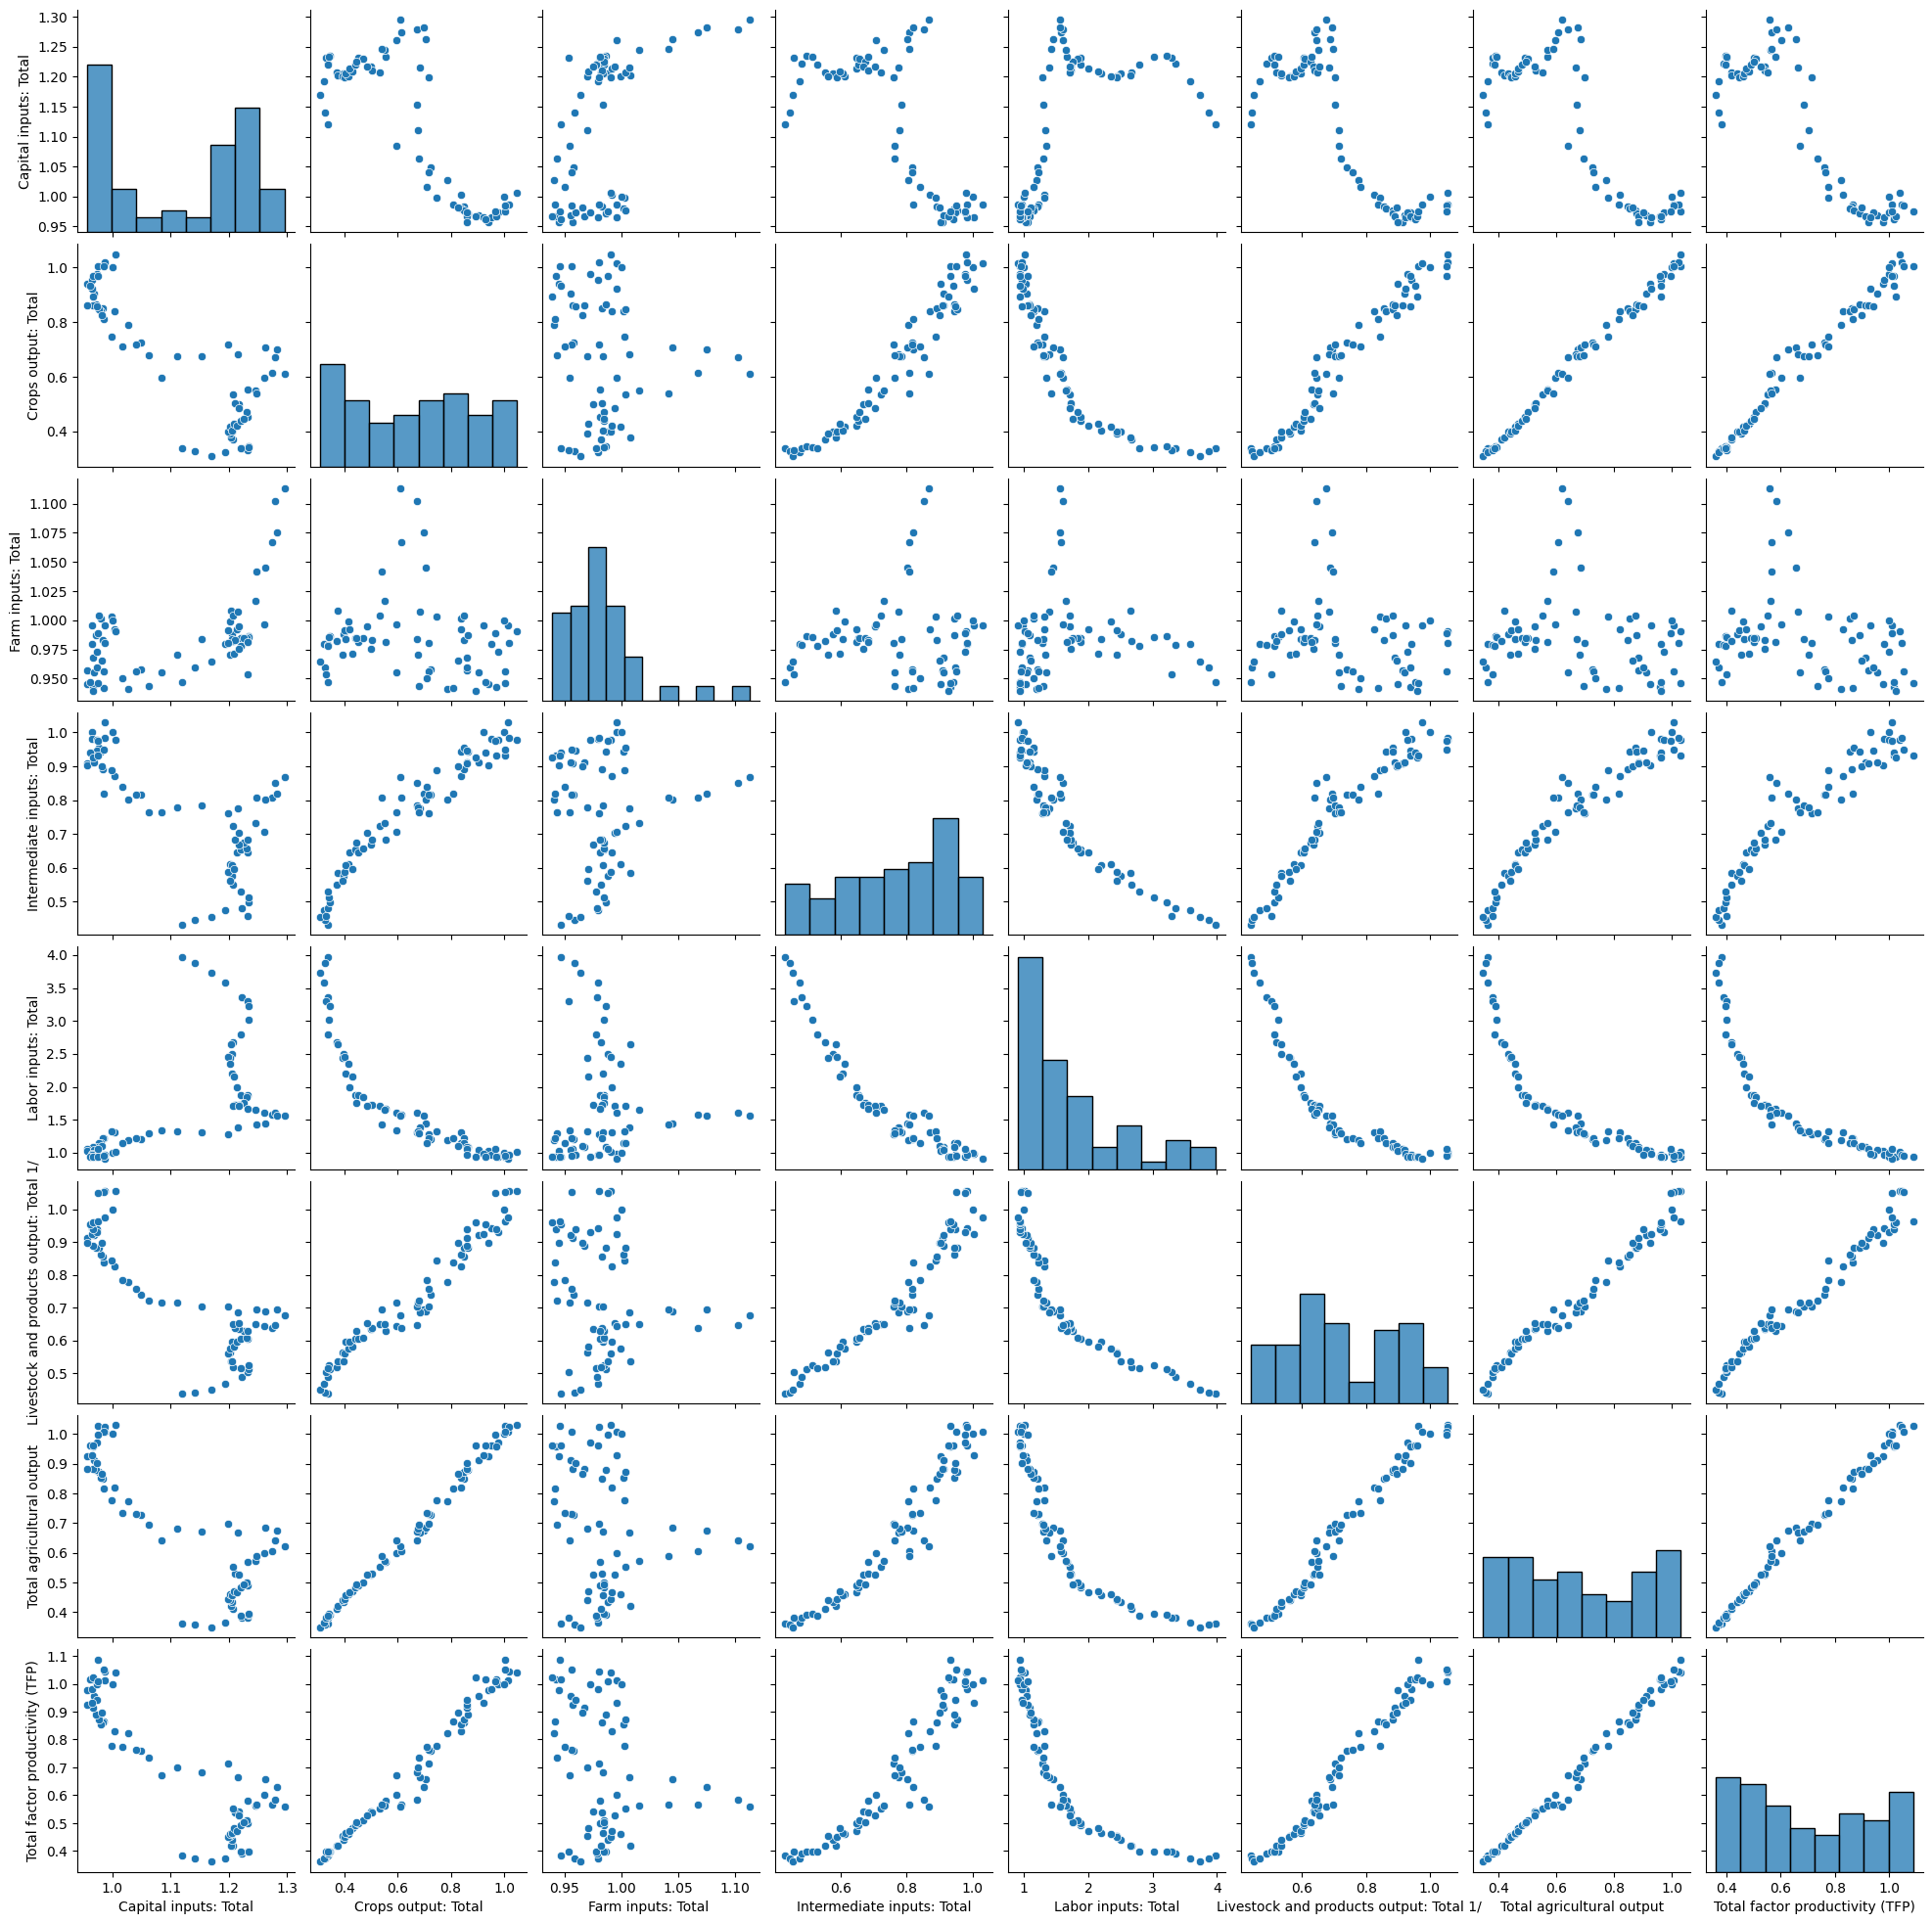

In [23]:
# Trends
sns.pairplot(data=usda_pivot)

In [24]:
# Correlations
usda_corr = usda_pivot.corr()
usda_corr

Attribute,Capital inputs: Total,Crops output: Total,Farm inputs: Total,Intermediate inputs: Total,Labor inputs: Total,Livestock and products output: Total 1/,Total agricultural output,Total factor productivity (TFP)
Attribute,,,,,,,,
Capital inputs: Total,1.000000,-0.819185,0.528602,-0.726520,0.598221,-0.841074,-0.842954,-0.875725
Crops output: Total,-0.819185,1.000000,-0.121781,0.960625,-0.869805,0.975112,0.996182,0.987509
Farm inputs: Total,0.528602,-0.121781,1.000000,0.060443,-0.001718,-0.175753,-0.156957,-0.252758
Intermediate inputs: Total,-0.726520,0.960625,0.060443,1.000000,-0.933136,0.948907,0.959724,0.934377
Labor inputs: Total,0.598221,-0.869805,-0.001718,-0.933136,1.000000,-0.865396,-0.868074,-0.852902
Livestock and products output: Total 1/,-0.841074,0.975112,-0.175753,0.948907,-0.865396,1.000000,0.987636,0.984460
Total agricultural output,-0.842954,0.996182,-0.156957,0.959724,-0.868074,0.987636,1.000000,0.994962
Total factor productivity (TFP),-0.875725,0.987509,-0.252758,0.934377,-0.852902,0.984460,0.994962,1.000000


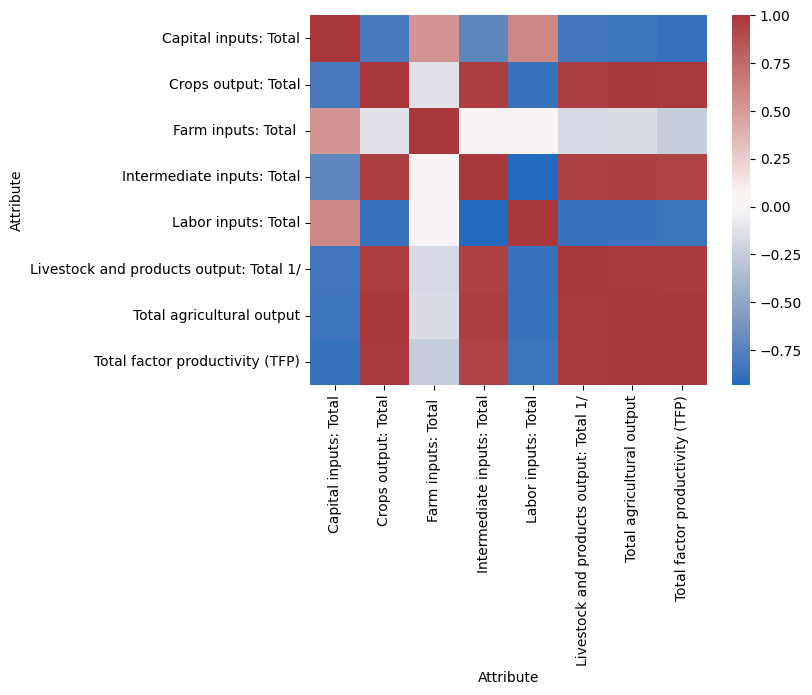

In [25]:
# Heatmap of correlations
sns.heatmap(usda_corr, cmap="vlag")
plt.show()